In [ ]:
import pickle
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, train_test_split

from tensorflow import keras

from xgboost import XGBRegressor

import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.regressor import ResidualsPlot
import shap

In [ ]:
T2 = pd.read_csv("../data/T2_r.csv")
meta_names = ["seqtype", "experiment", "minutes", "vivo_status", "positioning", "ischemia", "kidney_code"]
meta_data = T2["Image"].apply(lambda x: x.split("/")[-1].strip(".nrrd")).str.split("_", expand=True)
meta_data.columns = meta_names
meta_data.experiment = meta_data.experiment.astype(int)
meta_data.minutes = meta_data.minutes.astype(int)
numeric_cols_mask_pd = T2.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).values
t2_numeric = T2.loc[:, numeric_cols_mask_pd]
time = meta_data["minutes"]

X = t2_numeric
y = time

In [ ]:
# xgb_regressor = XGBRegressor()
# kf = StratifiedKFold(n_splits=5, shuffle=True)
# scores_T1 = cross_val_score(xgb_regressor, X, y, cv=kf, scoring="r2")
# print("Individual fold R2 scores:", scores_T1)
# print("Mean R2 score:", scores_T1.mean())
# print("Standard deviation of R2 scores:", scores_T1.std())

/Users/jgray/Documents/Code/radiomics_ml/.pixi/envs/default/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Individual fold R2 scores: [0.29709101 0.28873622 0.02514356 0.27349329 0.1524961 ]
Mean R2 score: 0.20739203691482544
Standard deviation of R2 scores: 0.10512870935104825


In [ ]:
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)
# pipeline = make_pipeline(
#     StandardScaler(),
#     PCA(n_components=.99),
#     Ridge()
# )

# pipeline.fit(xtrain, ytrain)
# pipeline.score(xtest, ytest)

0.373759190300488

In [ ]:
# pipeline = make_pipeline(
#     StandardScaler(),
#     XGBRegressor(random_state=42)
# )

# param_dist = {
#     'xgbregressor__n_estimators': [100, 250, 500, 750, 1000],
#     'xgbregressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'xgbregressor__max_depth': [3, 5, 7, 9],
#     'xgbregressor__subsample': np.arange(0.6, 1.0, 0.1), # From 0.6 to 0.9
#     'xgbregressor__colsample_bytree': np.arange(0.6, 1.0, 0.1),
#     'xgbregressor__gamma': [0, 0.1, 0.25, 0.5],
#     'xgbregressor__reg_alpha': [0, 0.005, 0.01, 0.1],
#     'xgbregressor__reg_lambda': [1, 1.5, 2, 3]
# }


# random_search = RandomizedSearchCV(
#     estimator=pipeline,
#     param_distributions=param_dist,
#     n_iter=50,  # Adjust n_iter based on your computational budget
#     cv=5,
#     scoring='r2',
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the model (assuming xtrain, ytrain are defined)
# random_search.fit(xtrain, ytrain)

# print("Best parameters found: ", random_search.best_params_)
# print("Best R2 score found: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/jgray/Documents/Code/radiomics_ml/.pixi/envs/default/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/jgray/Documents/Code/radiomics_ml/.pixi/envs/default/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/jgray/Documents/Code/radiomics_ml/.pixi/envs/default/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resou

Best parameters found:  {'xgbregressor__subsample': np.float64(0.6), 'xgbregressor__reg_lambda': 3, 'xgbregressor__reg_alpha': 0.1, 'xgbregressor__n_estimators': 750, 'xgbregressor__max_depth': 3, 'xgbregressor__learning_rate': 0.01, 'xgbregressor__gamma': 0.25, 'xgbregressor__colsample_bytree': np.float64(0.8999999999999999)}
Best R2 score found:  0.35892322063446047


In [ ]:
# param_grid = {
#     'xgbregressor__n_estimators': [750, 1000, 1250],
#     'xgbregressor__learning_rate': [0.001, 0.01, 0.0001],
#     'xgbregressor__max_depth': [2, 3, 4],
#     'xgbregressor__subsample': [0.5, 0.6, 0.7, 0.8],
#     'xgbregressor__colsample_bytree': [0.8, 0.85, 0.89, 0.91, 0.92]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the model
# grid_search.fit(xtrain, ytrain)

# print("Best parameters found: ", grid_search.best_params_)
# print("Best R2 score found: ", grid_search.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters found:  {'xgbregressor__colsample_bytree': 0.91, 'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 1000, 'xgbregressor__subsample': 0.6}
Best R2 score found:  0.3638471603393555


In [210]:
optimal_params = {'xgbregressor__colsample_bytree': 0.91, 
                  'xgbregressor__learning_rate': 0.01, 
                  'xgbregressor__max_depth': 2, 
                  'xgbregressor__n_estimators': 1000, 
                  'xgbregressor__subsample': 0.6}

In [ ]:
# with open("../models/best_time_T2.pkl", "b+w") as pout:
#     pickle.dump(grid_search.best_estimator_, pout)

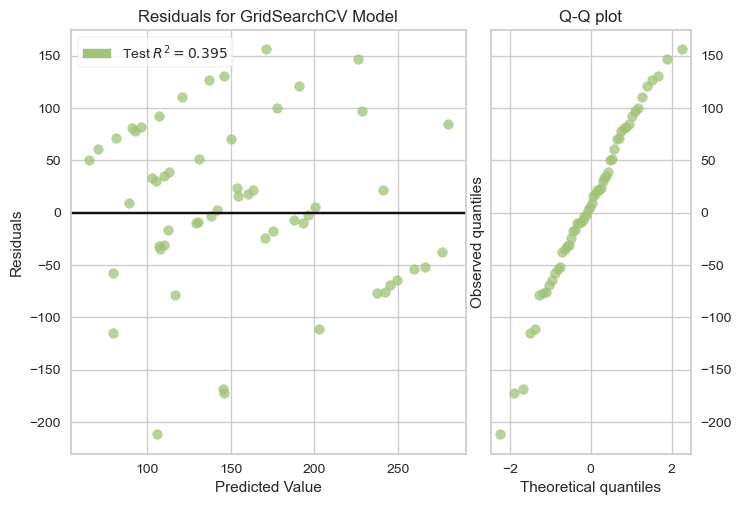

In [ ]:
# visualizer = ResidualsPlot(grid_search, hist=False, qqplot=True)
# visualizer.score(xtest, ytest)
# visualizer.show()
# plt.show()

In [ ]:
# grid_search.best_estimator_.score(xtest, ytest)

0.39526814222335815

In [ ]:
# grid_search.best_estimator_[1]

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.91
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


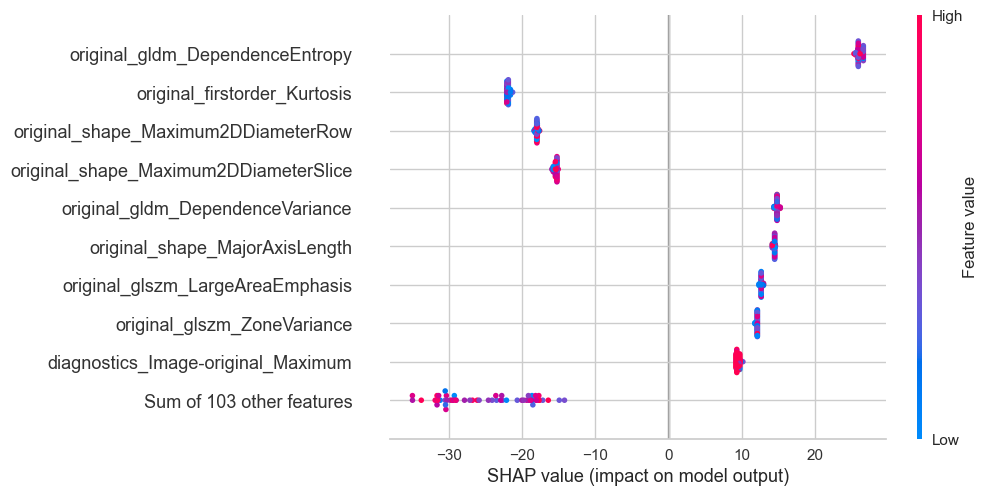

In [ ]:
# # Initialize the explainer with the best pipeline and the masker
# explainer = shap.Explainer(grid_search.best_estimator_[1])
# shap_values = explainer(xtest)
# shap.plots.beeswarm(shap_values)

In [ ]:
# mean_abs_shap_values = np.abs(shap_values.values).mean(0)
# feature_importance = pd.Series(mean_abs_shap_values, index=xtrain.columns)
# top_features = feature_importance.sort_values(ascending=False)
# top_9_feature_names = top_features.index[:20].tolist()

# print("Top 9 feature names:")
# print(top_9_feature_names)

Top 9 feature names:
['original_gldm_DependenceEntropy', 'original_firstorder_Kurtosis', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_gldm_DependenceVariance', 'original_shape_MajorAxisLength', 'original_glszm_LargeAreaEmphasis', 'original_glszm_ZoneVariance', 'diagnostics_Image-original_Maximum', 'original_shape_LeastAxisLength', 'original_gldm_DependenceNonUniformityNormalized', 'diagnostics_Image-original_Mean', 'original_shape_Maximum3DDiameter', 'original_firstorder_Skewness', 'original_glszm_SizeZoneNonUniformity', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_firstorder_10Percentile', 'original_gldm_DependenceNonUniformity', 'original_shape_Flatness', 'original_firstorder_Energy']


In [ ]:
top_20_features = ['original_gldm_DependenceEntropy', 'original_firstorder_Kurtosis', 
                   'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 
                   'original_gldm_DependenceVariance', 'original_shape_MajorAxisLength', 
                   'original_glszm_LargeAreaEmphasis', 'original_glszm_ZoneVariance', 
                   'diagnostics_Image-original_Maximum', 'original_shape_LeastAxisLength', 
                   'original_gldm_DependenceNonUniformityNormalized', 'diagnostics_Image-original_Mean', 
                   'original_shape_Maximum3DDiameter', 'original_firstorder_Skewness', 
                   'original_glszm_SizeZoneNonUniformity', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 
                   'original_firstorder_10Percentile', 'original_gldm_DependenceNonUniformity', 
                   'original_shape_Flatness', 'original_firstorder_Energy']


In [ ]:
top_shap = t2_numeric[top_20_feature_names]
xstrain, xstest, ystrain, ystest = train_test_split(top_shap, y, test_size=.2)

xgbr = XGBRegressor(colsample_bytree=0.91, 
                    learning_rate=0.015, 
                    max_depth=2, 
                    n_estimators=1000, 
                    subsample=0.6)
xgbr.fit(xstrain, ystrain)
xgbr.score(xstest, ystest)

0.5250059366226196

In [ ]:
# with open("../models/top20_features_r2_50_T2.pkl", "b+w") as pout:
#     pickle.dump(xgbr, pout)

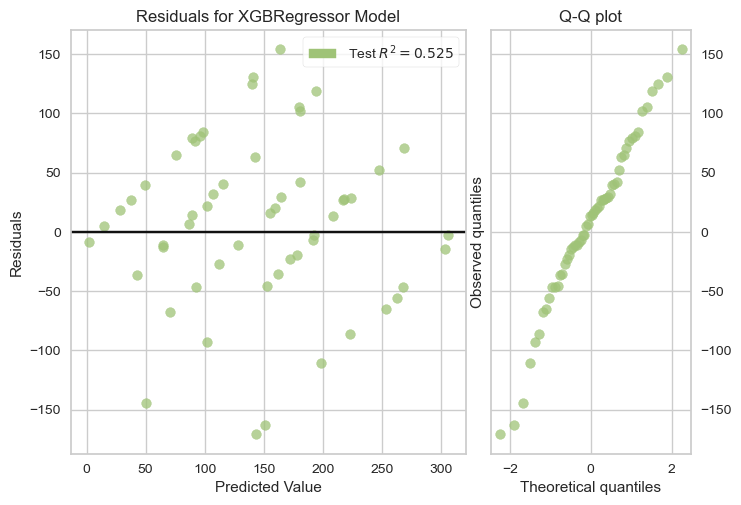

In [ ]:
visualizer = ResidualsPlot(xgbr, hist=False, qqplot=True)
visualizer.score(xstest, ystest)
visualizer.show()
plt.show()